# 군집 - 따릉이 대여소 군집화

## #01. 패키지

In [13]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame

# 군집화
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

## #02. 데이터 준비

In [4]:
origin = read_excel("https://data.hossam.kr/G02/SeoulBike.xlsx", index_col="대여소_ID")
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, ST-2105 to ST-1090
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   위도      3255 non-null   float64
 1   경도      3255 non-null   float64
 2   주소      3255 non-null   object 
dtypes: float64(2), object(1)
memory usage: 101.7+ KB
None


,위도,경도,주소
대여소_ID,,,
ST-2105,37.692322,127.048393,서울특별시 도봉구 마들로 932 평화문화진지
ST-2723,37.691013,127.049164,서울특별시 도봉구 도봉구 도봉동 1-22
ST-2695,37.689762,127.044891,서울 도봉구 도봉로 955
ST-2140,37.689762,127.044891,서울 도봉구 도봉로 955
ST-127,37.689762,127.044891,서울 도봉구 도봉로 955


## #03. 데이터 전처리

#### 필요한 필드만 추출

In [5]:
origin.columns

Index(['위도', '경도', '주소'], dtype='object')

In [7]:
df = origin.filter(['위도', '경도'])
df.head()

,위도,경도
대여소_ID,,
ST-2105,37.692322,127.048393
ST-2723,37.691013,127.049164
ST-2695,37.689762,127.044891
ST-2140,37.689762,127.044891
ST-127,37.689762,127.044891


### 데이터 표준화

In [12]:
scaler = MinMaxScaler()
# DF 내의 최소값과 최대값을 계산
scaler.fit(df)
# df의 각 열의 값을 해당 열의 최소값과 최대값 사이의 범위로 변환한 새로운 데이터 배열
n_data = scaler.transform(df)
# n_data

print("각 열의 표준화 평균값 : ", n_data[:, 0].mean(), n_data[:, 1].mean())
print("각 열의 표준화 최소값 : ", n_data[:, 0].min(), n_data[:, 1].min())
print("각 열의 표준화 최대값 : ", n_data[:, 0].max(), n_data[:, 1].max())

각 열의 표준화 평균값 :  0.5009029073660638 0.5037259583018636
각 열의 표준화 최소값 :  0.0 0.0
각 열의 표준화 최대값 :  1.0 1.0


## #04.군집화

### 군집 모델 구현

In [14]:
iner = []
sil = []

'''
range가 2부터 시작하는 이유
실우엣 점수는 클러스터 수가 2개 이상일 때 
의미를 가지므로 최소한 두 개의 클러스터가 필요'''
rn = range(2,50)
for k in rn:
    kmeans = KMeans(n_clusters=k, random_state=777)
    # 학습
    kmeans.fit(n_data)
    # 예측
    y_pred = kmeans.predict(n_data)
    # 결과 값
    score = silhouette_score(n_data, y_pred)
    sil.append(score)
    iner.append(kmeans.inertia_)

len(iner), len(sil)

(48, 48)

### 군집 결과 시각화

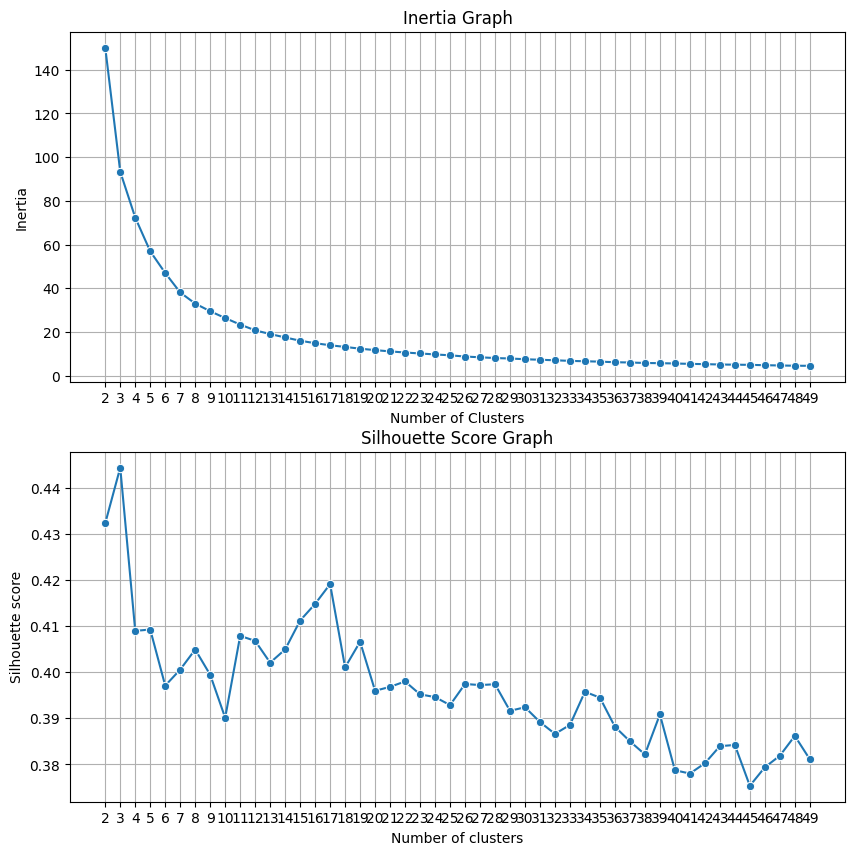

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sb.lineplot(x=rn, y=iner, marker="o", ax=ax1)
ax1.set_title("Inertia Graph")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Inertia")
ax1.set_xticks(rn)
ax1.set_xticklabels(rn)
ax1.grid()

sb.lineplot(x=rn, y=sil, marker="o", ax=ax2)
ax2.set_title("Silhouette Score Graph")
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Silhouette score")
ax2.set_xticks(rn)
ax2.set_xticklabels(rn)
ax2.grid()

plt.show()
plt.close()

## #05. 클러스터링 결과 시각화

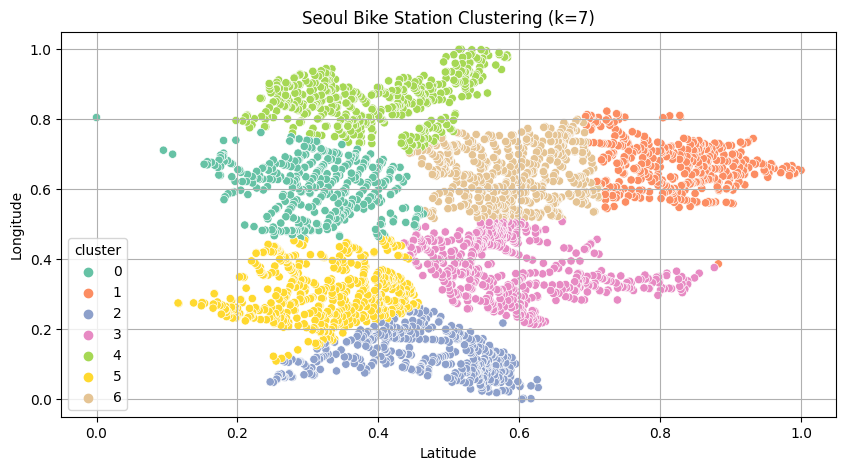

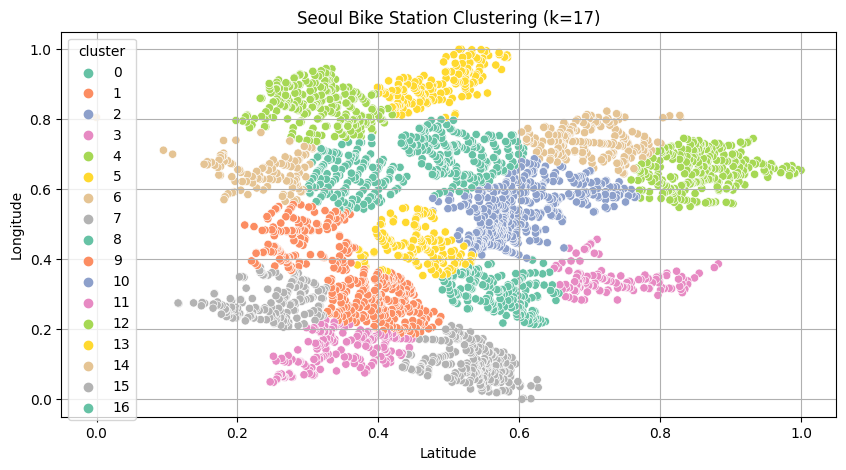

In [17]:
cluster = [7, 17]

for c in cluster:
    kmeans = KMeans(n_clusters=c, random_state=777)
    kmeans.fit(n_data)  #n_data 계산
    labels = kmeans.predict(n_data)

    result_df = DataFrame(n_data, columns=df.columns)
    result_df['cluster'] = labels

    plt.figure(figsize = (10,5))
    sb.scatterplot(data = result_df, x = result_df.columns[0],
                   y = result_df.columns[1], hue = 'cluster',
                   palette = 'Set2')
    plt.title("Seoul Bike Station Clustering (k={})".format(c))
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.grid()
    plt.show()
    plt.close()

## #06. GIS KMeans 결과

> 영상 참고